### Importing Modules

In [380]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,Sampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random

In [381]:
seed = 33
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [382]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Collection

In [383]:
deccan_bus=pd.read_csv(r"web_scraped_datasets\deccan_bus.csv")

In [384]:
deccan_bus.head()

,deccan_bus
0,US reciprocal tariffs on India to have limited...
1,HAL and DIAT forge partnership for advancing a...
2,Google opens fourth office campus 'Ananta' in ...
3,Ola Electric renegotiates registration agency ...
4,Explained | How a Moscow-linked influence camp...


In [385]:
deccan_bus.rename(columns={'deccan_bus':'statement'},inplace=True)

In [386]:
deccan_bus.duplicated().sum()

0

In [387]:
express_bus=pd.read_csv(r"web_scraped_datasets\express_bus.csv")

In [388]:
express_bus.head()

,express_bus
0,"Lifestyle purchases, online gaming, and dining..."
1,"Post-Covid demand plateaus, health premium gro..."
2,"Bharti Airtel promoter sells stake worth Rs 8,..."
3,Profit-booking leading FIIs to sell; investmen...
4,Govt asks private insurers to extend free look...


In [389]:
express_bus.rename(columns={'express_bus':'statement'},inplace=True)

In [390]:
express_bus.duplicated().sum()

7

In [391]:
express_bus.drop_duplicates(inplace=True)

In [392]:
hindu_bus=pd.read_csv(r"web_scraped_datasets\hindu_bus.csv")

In [393]:
hindu_bus.head()

,hindu_bus
0,Toyota opens bookings for Land Cruiser 300 wit...
1,SBI pegs India’s Q3FY25 GDP growth at 6.2%-6.3%
2,"Tesla starts recruitment in India, sends signa..."
3,Slight dip in unemployment rate in urban areas...
4,"Sensex, Nifty end marginally lower amid volati..."


In [394]:
hindu_bus.rename(columns={'hindu_bus':'statement'},inplace=True)

In [395]:
hindu_bus.duplicated().sum()

2

In [396]:
hindu_bus.drop_duplicates(inplace=True)

In [397]:
hindusthan_bus=pd.read_csv(r"web_scraped_datasets\hindusthan_bus.csv")

In [398]:
hindusthan_bus.head()

,hindusthan_bus
0,Infosys says it didn't use force or intimidate...
1,Inside ‘Ananta’: Google’s mega Bengaluru campu...
2,Bumble shares slide after weak forecast signal...
3,"Google to pay ₹3,000 crore to settle case over..."
4,"Tesla hiring in India: After Mumbai, Musk's co..."


In [399]:
hindusthan_bus.rename(columns={'hindusthan_bus':'statement'},inplace=True)

In [400]:
hindusthan_bus.duplicated().sum()

0

In [401]:
india_bus=pd.read_csv(r"web_scraped_datasets\india_bus.csv")

In [402]:
india_bus.head()

,india_bus
0,These well-known multibaggers are down over 50...
1,"JBM Auto shares close higher on Rs 5,500-crore..."
2,"Data Patterns shares hit 52-week low, rebound ..."
3,"Inox Wind shares slip 35% from record high, ti..."
4,"RVNL, Jupiter Wagons, IRCTC, Titagarh Rail sha..."


In [403]:
india_bus.duplicated().sum()

0

In [404]:
india_bus.rename(columns={'india_bus':'statement'},inplace=True)

In [405]:
ndtv_bus=pd.read_csv(r"web_scraped_datasets\ndtv_bus.csv")

In [406]:
ndtv_bus.head()

,ndtv_bus
0,Trade Setup For Feb. 20: Nifty Steady Within R...
1,Trade Setup For Feb. 20: Nifty Steady Within R...
2,"Google Expands In India, Opens New Office I..."
3,"Business Travelers, Peak Hour Flyers May Ha..."
4,NC-JCM Seeks Uniform Fitment Factor Across ...


In [407]:
ndtv_bus.duplicated().sum()

7

In [408]:
ndtv_bus.drop_duplicates(inplace=True)

In [409]:
ndtv_bus.rename(columns={'ndtv_bus':'statement'},inplace=True)

In [410]:
tof_bus=pd.read_csv(r"web_scraped_datasets\tof_bus.csv")

In [411]:
tof_bus.head()

,tof_bus
0,What is LIC Smart Pension Plan? Top 10 FAQs an...
1,PM Modi US visit: 1+1 = 11 - US and India team...
2,Tesla India entry: Why Donald Trump has said i...
3,Boost for ‘Make in India’! iPhone parts maker ...
4,'More of white noise': Why Trump’s reciprocal ...


In [412]:
tof_bus.rename(columns={'tof_bus':'statement'},inplace=True)

In [413]:
tof_bus.duplicated().sum()

18

In [414]:
tof_bus.drop_duplicates(inplace=True)

In [415]:
df_bus=pd.concat([deccan_bus,express_bus,hindu_bus,hindusthan_bus,india_bus,ndtv_bus,tof_bus],axis=0)

In [416]:
df_bus

,statement
0,US reciprocal tariffs on India to have limited...
1,HAL and DIAT forge partnership for advancing a...
2,Google opens fourth office campus 'Ananta' in ...
3,Ola Electric renegotiates registration agency ...
4,Explained | How a Moscow-linked influence camp...
...,...
166,Tatas to inject Rs 500 crore in Mumbai's Breac...
167,High liquidity costs limit rate cut impact: Ax...
168,"Cognizant hits back, says Infosys deflecting a..."
169,"Sebi de-registers 19 defunct foreign VCs, says..."


In [417]:
df_bus.reset_index(drop=True,inplace=True)

In [418]:
df_bus.shape

(277, 1)

In [419]:
df_bus['label']='business'

In [420]:
df_bus.head()

,statement,label
0,US reciprocal tariffs on India to have limited...,business
1,HAL and DIAT forge partnership for advancing a...,business
2,Google opens fourth office campus 'Ananta' in ...,business
3,Ola Electric renegotiates registration agency ...,business
4,Explained | How a Moscow-linked influence camp...,business


# 

In [421]:
deccan_enter=pd.read_csv(r"web_scraped_datasets\deccan_enter.csv")

In [422]:
deccan_enter.head()

,deccan_enter
0,Leaking pipeline in 'Mrs' a metaphor for patri...
1,"Richa Chadha, Ali Fazal board queer drama 'TAP..."
2,"Shweta Tripathi to turn producer, says she fee..."
3,Comedy is an important genre for family audien...


In [423]:
deccan_enter.duplicated().sum()

0

In [424]:
deccan_enter.rename(columns={'deccan_enter':'statement'},inplace=True)

In [425]:
express_enter=pd.read_csv(r"web_scraped_datasets\express_enter.csv")

In [426]:
express_enter.head()

,express_enter
0,Marco: Unni Mukundan's reprehensible film ruin...
1,Bada Naam Karenge: Sooraj Barjatya acknowledge...
2,Chhaava box office Day 5: Vicky Kaushal's bloc...
3,"Karan Johar on 35 years of Agneepath, remaking..."
4,"Arm-twisting, blacklisting, and mud-slinging: ..."


In [427]:
express_enter.duplicated().sum()

2

In [428]:
express_enter.drop_duplicates(inplace=True)

In [429]:
express_enter.rename(columns={'express_enter':'statement'},inplace=True)

In [430]:
hindu_enter=pd.read_csv(r"web_scraped_datasets\hindu_enter.csv")

In [431]:
hindu_enter.head()

,hindu_enter
0,Director Varsha Bharath on what it takes to be...
1,"‘Understatement to say I am overwhelmed,’ says..."
2,"‘Chhaava’ movie review: Vicky Kaushal, Akshaye..."
3,‘Captain America: Brave New World’ movie revie...
4,‘Captain America: Brave New World’ movie revie...


In [432]:
hindu_enter.duplicated().sum()

6

In [433]:
hindu_enter.drop_duplicates(inplace=True)

In [434]:
hindu_enter.rename(columns={'hindu_enter':'statement'},inplace=True)

In [435]:
india_enter=pd.read_csv(r"web_scraped_datasets\india_enter.csv")

In [436]:
india_enter.head()

,india_enter
0,Tom Holland couldn't buy his own non-alcoholic...
1,Kevin Spacey responds to Guy Pearce's allegati...
2,"The First Frost review: Love, trauma, longing ..."
3,Blake Lively alleges co-star Justin Baldoni ma...
4,Salman Khan's look from Hollywood debut surfac...


In [437]:
india_enter.duplicated().sum()

0

In [438]:
india_enter.rename(columns={'india_enter':'statement'},inplace=True)

In [439]:
ndtv_enter=pd.read_csv(r"web_scraped_datasets\ndtv_enter.csv")

In [440]:
ndtv_enter.head()

,ndtv_enter
0,Raj &amp; DK On Financial Fraud Reports On Gul...
1,Imtiaz Ali On Shammi Kapoor Shooting For Rocks...
2,Sanam Teri Kasam 2: Shraddha To Be Cast Opposi...
3,J-Hope's Reaction To Jin's Birthday Surprise I...
4,Watch: Zanai Bhosle And Mohammed Siraj Vibing ...


In [441]:
ndtv_enter.duplicated().sum()


5

In [442]:
ndtv_enter.drop_duplicates(inplace=True)

In [443]:
ndtv_enter.rename(columns={'ndtv_enter':'statement'},inplace=True)

In [444]:
tof_enter=pd.read_csv(r"web_scraped_datasets\tof_enter.csv")

In [445]:
tof_enter.head()

,tof_enter
0,Hurtful things you should never say to your pa...
1,Fruits that help burn belly fat
2,Building a balanced study routine for children
3,Hanuman Chalisa vs Bajrang Baan
4,Stylish wedding pictures of 'Husn' singer Anuv...


In [446]:
tof_enter.duplicated().sum()

18

In [447]:
tof_enter.drop_duplicates(inplace=True)

In [448]:
tof_enter.rename(columns={'tof_enter':'statement'},inplace=True)

In [449]:
df_enter=pd.concat([deccan_enter,express_enter,hindu_enter,india_enter,ndtv_enter,tof_enter],axis=0)

In [450]:
df_enter

,statement
0,Leaking pipeline in 'Mrs' a metaphor for patri...
1,"Richa Chadha, Ali Fazal board queer drama 'TAP..."
2,"Shweta Tripathi to turn producer, says she fee..."
3,Comedy is an important genre for family audien...
0,Marco: Unni Mukundan's reprehensible film ruin...
...,...
130,William-Kate risked the line of succession by ...
131,Psychologist differentiate love from toxicity:...
132,It's a fact! Hugs can boost your immunity and ...
133,5 signs your coworker is 'productivity peacock...


In [451]:
df_enter.reset_index(drop=True,inplace=True)

In [452]:
df_enter['label']='entertainment'

In [453]:
df_enter.head()

,statement,label
0,Leaking pipeline in 'Mrs' a metaphor for patri...,entertainment
1,"Richa Chadha, Ali Fazal board queer drama 'TAP...",entertainment
2,"Shweta Tripathi to turn producer, says she fee...",entertainment
3,Comedy is an important genre for family audien...,entertainment
4,Marco: Unni Mukundan's reprehensible film ruin...,entertainment


#

In [454]:
deccan_sports=pd.read_csv(r"web_scraped_datasets\deccan_sports.csv")

In [455]:
deccan_sports.head()

,deccan_sports
0,"With more than 40 brands on board, Ganguly rem..."
1,Pakistan opt to bowl against New Zealand in Ch...
2,Shubman Gill dethrones Babar Azam to become No...
3,"India look to rise above selection challenges,..."
4,Fact Check | Pakistan Cricket Board denies cla...


In [456]:
deccan_sports.duplicated().sum()

0

In [457]:
deccan_sports.rename(columns={'deccan_sports':'statement'},inplace=True)

In [458]:
express_sports=pd.read_csv(r"web_scraped_datasets\express_sports.csv")

In [459]:
express_sports.head()

,express_sports
0,"Pakistan vs New Zealand LIVE Cricket Score, Ch..."
1,‘Upbeat’ Bangladesh captain Shanto confident a...
2,Ranji Trophy: Priyank Panchal's commanding hun...
3,Vidarbha in driver’s seat despite Mumbai lower...
4,"Stage set in Karachi today, India waits in Dub..."


In [460]:
express_sports.duplicated().sum()

3

In [461]:
express_sports.drop_duplicates(inplace=True)

In [462]:
express_sports.rename(columns={'express_sports':'statement'},inplace=True)

In [463]:
hindu_sports=pd.read_csv(r"web_scraped_datasets\hindu_sports.csv")

In [464]:
hindu_sports.head()

,hindu_sports.
0,ICC approves Jamieson as replacement for Fergu...
1,WPL | Mumbai Indians continues domination over...
2,Champions Trophy: Pakistan begins title defenc...
3,Jan Zelezny’s tweaks will take me to 90m mark ...
4,"Champions Trophy 2025: Young, Latham guide New..."


In [465]:
hindu_sports.duplicated().sum()

0

In [466]:
hindu_sports.rename(columns={'hindu_sports.':'statement'},inplace=True)

In [467]:
hindusthan_sports=pd.read_csv(r"web_scraped_datasets\hindusthan_sports.csv")

In [468]:
hindusthan_sports.head()

,hindusthan_sports
0,Inter misses chance to go top of Serie A after...


In [469]:
hindusthan_sports.rename(columns={'hindusthan_sports':'statement'},inplace=True)

In [470]:
india_sports=pd.read_csv(r"web_scraped_datasets\india_sports.csv")

In [471]:
india_sports.head()

,india_sports
0,"WPL 2025, UP Warriorz vs Delhi Capitals: Live ..."
1,Pakistan fans happily welcome Champions Trophy...
2,Will Young dazzles on Champions Trophy debut w...
3,Bangladesh can beat any team in the Champions ...
4,BCCI should be taught a lesson: Ex-spinner bef...


In [472]:
india_sports.duplicated().sum()

9

In [473]:
india_sports.drop_duplicates(inplace=True)

In [474]:
india_sports.rename(columns={'india_sports':'statement'},inplace=True)

In [475]:
ndtv_sports=pd.read_csv(r"web_scraped_datasets\ndtv_sports.csv")

In [476]:
ndtv_sports.head()

,ndtv_sports
0,Champions Trophy Live: Pak Script Unwanted Rec...
1,Massive Scare For Pakistan As Fakhar Zaman Suf...
2,Pakistan Air Force Show Scares NZ Players In K...
3,Pakistan Board Takes Big Step Days After India...
4,"""Does He Play For India?"": Pak Star Blasts PCB..."


In [477]:
ndtv_sports.duplicated().sum()

15

In [478]:
ndtv_sports.drop_duplicates(inplace=True)

In [479]:
ndtv_sports.rename(columns={'ndtv_sports':'statement'},inplace=True)

In [480]:
tof_sports=pd.read_csv(r"web_scraped_datasets\tof_sports.csv")

In [481]:
tof_sports.duplicated().sum()

12

In [482]:
tof_sports.drop_duplicates(inplace=True)

In [483]:
tof_sports.rename(columns={'tof_sports':'statement'},inplace=True)

In [484]:
df_sports=pd.concat([deccan_sports,express_sports,hindu_sports,hindusthan_sports,india_sports,ndtv_sports,tof_sports],axis=0)

In [485]:
df_sports.reset_index(drop=True,inplace=True)

In [486]:
df_sports

,statement
0,"With more than 40 brands on board, Ganguly rem..."
1,Pakistan opt to bowl against New Zealand in Ch...
2,Shubman Gill dethrones Babar Azam to become No...
3,"India look to rise above selection challenges,..."
4,Fact Check | Pakistan Cricket Board denies cla...
...,...
290,Praveen Kumar takes India's gold tally to 6 on...
291,The Pittsburgh Penguins and the Penguins Found...
292,“I’m very pumped”: Steve Erceg shares his exci...
293,TOISA 2024: Celebrating the strength and spiri...


In [487]:
df_sports['label']='sports'

In [488]:
df_sports

,statement,label
0,"With more than 40 brands on board, Ganguly rem...",sports
1,Pakistan opt to bowl against New Zealand in Ch...,sports
2,Shubman Gill dethrones Babar Azam to become No...,sports
3,"India look to rise above selection challenges,...",sports
4,Fact Check | Pakistan Cricket Board denies cla...,sports
...,...,...
290,Praveen Kumar takes India's gold tally to 6 on...,sports
291,The Pittsburgh Penguins and the Penguins Found...,sports
292,“I’m very pumped”: Steve Erceg shares his exci...,sports
293,TOISA 2024: Celebrating the strength and spiri...,sports


#

In [489]:
deccan_tech=pd.read_csv(r"web_scraped_datasets\deccan_tech.csv")

In [490]:
deccan_tech.head()

,deccan_tech
0,Samsung unveils Galaxy A06 5G in India
1,Apple to launch new lower-cost iPhone to captu...
2,Google opens fourth office campus 'Ananta' in ...
3,All you need to know about Zomato's AI custome...
4,Nothing Phone (3a) to come with big camera upg...


In [491]:
deccan_tech.duplicated().sum()

0

In [492]:
deccan_tech.rename(columns={'deccan_tech':"statement"},inplace=True)

In [493]:
express_tech=pd.read_csv(r"web_scraped_datasets\express_tech.csv")

In [494]:
express_tech.duplicated().sum()

2

In [495]:
express_tech.drop_duplicates(inplace=True)

In [496]:
express_tech.rename(columns={'express_tech':"statement"},inplace=True)

In [497]:
hindu_tech=pd.read_csv(r"web_scraped_datasets\hindu_tech.csv")

In [498]:
hindu_tech.head()

,hindu_tech
0,Your download of the top 5 technology stories ...
1,Humane’s AI Pin will go out of service as HP b...
2,Milind Soman named as Garmin’s new brand ambas...
3,Google veteran Wu Yonghui joins ByteDance to l...
4,Uber Auto moves to cash-only mode to counter s...


In [499]:
hindu_tech.duplicated().sum()

7

In [500]:
hindu_tech.drop_duplicates(inplace=True)

In [501]:
hindu_tech.rename(columns={'hindu_tech':"statement"},inplace=True)

In [502]:
india_tech=pd.read_csv(r"web_scraped_datasets\india_tech.csv")

In [503]:
india_tech.head()

,india_tech
0,"Tech Predictions for 2025: AI everything, ever..."
1,Acer doubles down on India with Acerpure: A co...
2,Beyond code: Microsoft's Charu Srinivasan on m...
3,"Tata Group, Infosys named India’s most valuabl..."
4,IT and cloud investments are on the rise as MS...


In [504]:
india_tech.duplicated().sum()

0

In [505]:
india_tech.rename(columns={'india_tech':"statement"},inplace=True)

In [506]:
ndtv_tech=pd.read_csv(r"web_scraped_datasets\ndtv_tech.csv")

In [507]:
ndtv_tech.head()

,ndtv_tech
0,Realme P3 Pro First Impressions: Sensible Upgr...
1,Samsung Galaxy S25 Ultra Review
2,Asus ExpertBook P5 (P5405) Review: Sleek and S...
3,CyberPowerPC Game Master 715 Review: A Master ...
4,POCO X7 Pro Review: A Mid-Range That Does It All?


In [508]:
ndtv_tech.duplicated().sum()

13

In [509]:
ndtv_tech.drop_duplicates(inplace=True)

In [510]:
ndtv_tech.rename(columns={'ndtv_tech':"statement"},inplace=True)

In [511]:
tof_tech=pd.read_csv(r"web_scraped_datasets\tof_tech.csv")

In [512]:
tof_tech.head()

,tof_tech
0,Galaxy S25: Cutting-edge features &amp; unbeat...
1,Uber is changing its “Auto” model: What this m...
2,Perplexity AI CEO Aravind Srinivas compliments...
3,Tesla coming to India: Anand Mahindra says 'wi...
4,"Samsung Galaxy A06 5G with 50MP camera, 5,000 ..."


In [513]:
tof_tech.duplicated().sum()

31

In [514]:
tof_tech.drop_duplicates(inplace=True)

In [515]:
tof_tech.rename(columns={'tof_tech':"statement"},inplace=True)

In [516]:
df_tech=pd.concat([deccan_tech,express_tech,hindu_tech,india_tech,ndtv_tech,tof_tech])

In [517]:
df_tech.reset_index(drop=True,inplace=True)

In [518]:
df_tech

,statement
0,Samsung unveils Galaxy A06 5G in India
1,Apple to launch new lower-cost iPhone to captu...
2,Google opens fourth office campus 'Ananta' in ...
3,All you need to know about Zomato's AI custome...
4,Nothing Phone (3a) to come with big camera upg...
...,...
320,King Legacy codes February 2025: Get freebies ...
321,Donald Trump jokes on Elon Musk' go-to-work T-...
322,Facebook founder Mark Zuckerberg sells Meta sh...
323,Da Hood codes February 2025: Earn cash and kno...


In [519]:
df_tech['label']='technology'

In [520]:
df_tech.head()

,statement,label
0,Samsung unveils Galaxy A06 5G in India,technology
1,Apple to launch new lower-cost iPhone to captu...,technology
2,Google opens fourth office campus 'Ananta' in ...,technology
3,All you need to know about Zomato's AI custome...,technology
4,Nothing Phone (3a) to come with big camera upg...,technology


In [521]:
df=pd.concat([df_bus,df_enter,df_sports,df_tech],axis=0)

In [522]:
df.reset_index(drop=True,inplace=True)

In [523]:
df

,statement,label
0,US reciprocal tariffs on India to have limited...,business
1,HAL and DIAT forge partnership for advancing a...,business
2,Google opens fourth office campus 'Ananta' in ...,business
3,Ola Electric renegotiates registration agency ...,business
4,Explained | How a Moscow-linked influence camp...,business
...,...,...
1160,King Legacy codes February 2025: Get freebies ...,technology
1161,Donald Trump jokes on Elon Musk' go-to-work T-...,technology
1162,Facebook founder Mark Zuckerberg sells Meta sh...,technology
1163,Da Hood codes February 2025: Earn cash and kno...,technology


In [524]:
df.label.value_counts()

label
technology       325
sports           295
business         277
entertainment    268
Name: count, dtype: int64

### Data PreProcessing

In [525]:
def dit(x):
    dit={'technology':0,'sports':1,'business':2,'entertainment':3}
    return dit[x]

In [526]:
df["category"] = df['label'].apply(dit)

In [527]:
df["category"].value_counts()

category
0    325
1    295
2    277
3    268
Name: count, dtype: int64

In [528]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  1165 non-null   object
 1   label      1165 non-null   object
 2   category   1165 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 27.4+ KB


In [530]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [531]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = word_tokenize(text)
    return tokens
    
train_df["tokens"] = train_df["statement"].apply(preprocess_text)
test_df["tokens"] = test_df["statement"].apply(preprocess_text)

In [532]:
print(train_df["tokens"])

810     [a, moneyhungry, squirrel, jake, paul, fires, ...
533     [is, earths, oxygen, running, out, supercomput...
964     [red, magic, 10, pro, vs, cmf, by, nothing, ph...
602     [jannik, sinner, doping, ban, wada, defends, s...
803     [fih, pro, league, india, women, eye, regainin...
                              ...                        
1044    [shahid, kapoors, deva, full, movie, leaked, o...
1095    [elon, musks, daughter, reacts, to, ashley, st...
1130    [we, tried, zotacs, premium, rtx, 5080, card, ...
860     [iphone, se, 4th, gen, incoming, apple, ceo, t...
1126    [ipad, mini, 2024, review, a, goeverywhere, ta...
Name: tokens, Length: 932, dtype: object


In [533]:
w2v_model = Word2Vec(train_df["tokens"].tolist(), vector_size=50, window=5, min_count=1, sg=0)
word_vectors = w2v_model.wv
print(word_vectors["market"]) 

[-0.00833422  0.00793392 -0.0052748  -0.0094702  -0.00850319 -0.01394522
  0.00993018 -0.01093282 -0.01932033 -0.01004404  0.01521147  0.00081088
  0.01100501  0.01808687 -0.0136323  -0.00805847  0.01733622  0.01005145
  0.0061674   0.01623581  0.01939922 -0.00337198  0.00687313  0.00884923
  0.01914289  0.02020434 -0.01771819 -0.00968043  0.00641165  0.00131485
  0.00028025  0.01449897  0.01259527 -0.01394978 -0.00687632 -0.0148074
  0.01612199  0.00485984 -0.00307023  0.00087177  0.01719775  0.01390898
  0.01243443  0.00639353  0.00808958  0.01767522  0.0019377  -0.00178967
 -0.01723748  0.00647578]


In [534]:
word_to_ix = {word: i for i, word in enumerate(w2v_model.wv.index_to_key)}
def prepare_sequence(tokens, word_to_ix):
    return [word_to_ix[word] for word in tokens if word in word_to_ix]

In [535]:
train_df["numerical_sequence"] = train_df["tokens"].apply(lambda x: prepare_sequence(x, word_to_ix))
test_df["numerical_sequence"] = test_df["tokens"].apply(lambda x: prepare_sequence(x, word_to_ix))

### Train and Test Splitting

In [536]:
train_sentences = [torch.tensor(seq, dtype=torch.long) for seq in train_df["numerical_sequence"]]
train_labels = torch.tensor(train_df["category"].values, dtype=torch.long)

test_sentences = [torch.tensor(seq, dtype=torch.long) for seq in test_df["numerical_sequence"]]
test_labels = torch.tensor(test_df["category"].values, dtype=torch.long)

###  LSTM Model

In [537]:


class NewsLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(NewsLSTMModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(w2v_model.wv.vectors), freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.dropout=nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        embedded = self.embedding(x) 
        lstm_out, inner_layers = self.lstm(embedded)
        drop=self.dropout(lstm_out[:, -1, :])
        output = self.fc(drop)
        return output


### Model Training

In [538]:
embedding_dim = 50
hidden_dim = 64
output_dim = 4

In [539]:
model = NewsLSTMModel(vocab_size=len(word_to_ix), embedding_dim=embedding_dim, hidden_dim=hidden_dim, output_dim=output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00002)
epochs = 100
patience=10
best_loss=float('inf')
train_losses=[]
test_losses=[]

In [540]:
for epoch in range(epochs):
    total_train_loss = 0
    val_loss=0
    model.train()
    for i, sentence in enumerate(train_sentences):
        sentence = sentence.unsqueeze(0)
        label = train_labels[i].unsqueeze(0)
        
        output = model(sentence)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item()
    train_losses.append(total_train_loss/len(train_sentences))
            
    with torch.no_grad():
        model.eval()
        
        for i, sentence in enumerate(test_sentences):
            sentence = sentence.unsqueeze(0)
            test_label = test_labels[i].unsqueeze(0)
            test_output = model(sentence)
            val_loss+=criterion(test_output,test_label)
        
        val_loss=val_loss/len(test_sentences)
        test_losses.append(val_loss)
        
        if val_loss < best_loss:
            best_loss = val_loss
            counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

         
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_train_loss/len(train_sentences):.4f},val_loss: {val_loss:.4f}")


Epoch 1/100, Loss: 1.3847,val_loss: 1.3841
Epoch 2/100, Loss: 1.3832,val_loss: 1.3837
Epoch 3/100, Loss: 1.3835,val_loss: 1.3833
Epoch 4/100, Loss: 1.3816,val_loss: 1.3827
Epoch 5/100, Loss: 1.3812,val_loss: 1.3820
Epoch 6/100, Loss: 1.3786,val_loss: 1.3811
Epoch 7/100, Loss: 1.3776,val_loss: 1.3797
Epoch 8/100, Loss: 1.3756,val_loss: 1.3777
Epoch 9/100, Loss: 1.3696,val_loss: 1.3747
Epoch 10/100, Loss: 1.3632,val_loss: 1.3695
Epoch 11/100, Loss: 1.3505,val_loss: 1.3592
Epoch 12/100, Loss: 1.3169,val_loss: 1.3294
Epoch 13/100, Loss: 1.2317,val_loss: 1.2839
Epoch 14/100, Loss: 1.1292,val_loss: 1.2215
Epoch 15/100, Loss: 1.0337,val_loss: 1.1690
Epoch 16/100, Loss: 0.9492,val_loss: 1.1450
Epoch 17/100, Loss: 0.8808,val_loss: 1.1179
Epoch 18/100, Loss: 0.8230,val_loss: 1.0883
Epoch 19/100, Loss: 0.7529,val_loss: 1.0704
Epoch 20/100, Loss: 0.6757,val_loss: 1.0455
Epoch 21/100, Loss: 0.5843,val_loss: 1.0033
Epoch 22/100, Loss: 0.4985,val_loss: 0.9609
Epoch 23/100, Loss: 0.4196,val_loss: 0.92

### Evaluation of Model

In [541]:
model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [542]:
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for i, sentence in enumerate(train_sentences):
        sentence = sentence.unsqueeze(0)
        output = model(sentence)
        predicted_label = torch.argmax(output, dim=1).item()
        
        y_true.append(train_labels[i].item())
        y_pred.append(predicted_label)

accuracy = accuracy_score(y_true, y_pred)
print(f"Train Accuracy: {accuracy:.4f}")

Train Accuracy: 0.9807


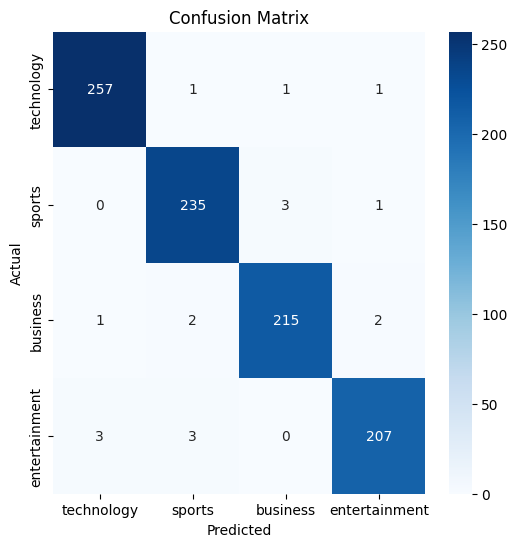

In [543]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['technology','sports','business','entertainment'], yticklabels=['technology','sports','business','entertainment'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [544]:
print("Train Classification Report:")
print(classification_report(y_true, y_pred, target_names=['technology','sports','business','entertainment']))

Train Classification Report:
               precision    recall  f1-score   support

   technology       0.98      0.99      0.99       260
       sports       0.98      0.98      0.98       239
     business       0.98      0.98      0.98       220
entertainment       0.98      0.97      0.98       213

     accuracy                           0.98       932
    macro avg       0.98      0.98      0.98       932
 weighted avg       0.98      0.98      0.98       932



In [545]:
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for i, sentence in enumerate(test_sentences):
        sentence = sentence.unsqueeze(0)  # Add batch dimension
        output = model(sentence)
        predicted_label = torch.argmax(output, dim=1).item()
        
        y_true.append(test_labels[i].item())
        y_pred.append(predicted_label)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.7382


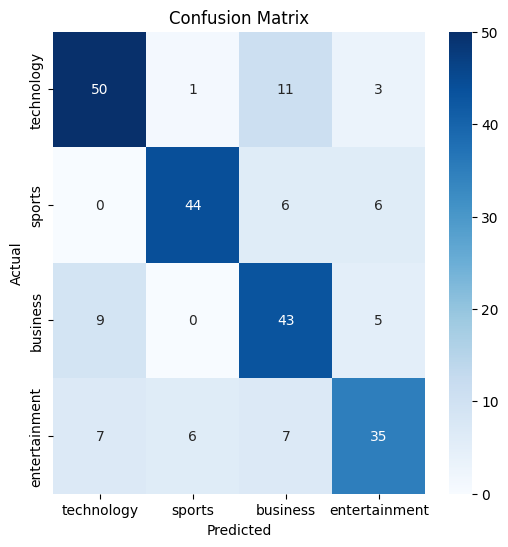

In [546]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['technology','sports','business','entertainment'], yticklabels=['technology','sports','business','entertainment'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [547]:
print("Test Classification Report:")
print(classification_report(y_true, y_pred, target_names=['technology','sports','business','entertainment']))

Test Classification Report:
               precision    recall  f1-score   support

   technology       0.76      0.77      0.76        65
       sports       0.86      0.79      0.82        56
     business       0.64      0.75      0.69        57
entertainment       0.71      0.64      0.67        55

     accuracy                           0.74       233
    macro avg       0.74      0.74      0.74       233
 weighted avg       0.74      0.74      0.74       233



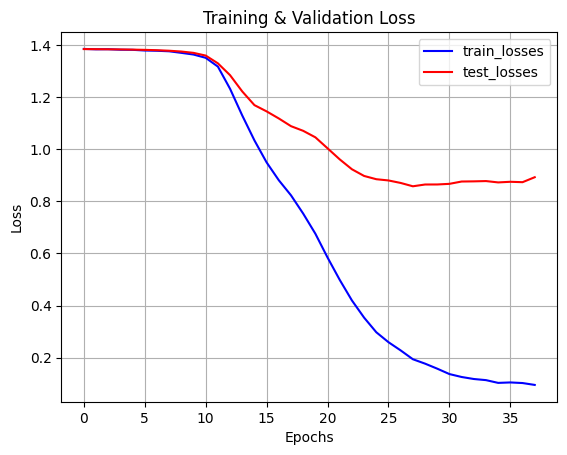

In [548]:
plt.plot(train_losses, label='train_losses', color='blue')
plt.plot(test_losses, label='test_losses', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()
plt.show()

### Sample Testing

In [549]:
d={0:'technology',1:'sports',2:'business',3:'entertainment'}
test_text = "LIC receives ₹57.2 crore GST notice from Delhi Government"
test_tokens = preprocess_text(test_text)
test_sequence = prepare_sequence(test_tokens, word_to_ix)
test_tensor = torch.tensor(test_sequence, dtype=torch.long).unsqueeze(0)
model.eval()
with torch.no_grad():
    output = model(test_tensor)
    predicted_label = torch.argmax(output, dim=1).item()

print("Predicted Category:",d[predicted_label])


Predicted Category: business
